In [ ]:
'''check labels for granite using granite_labels.csv against granite0dust_test_015s_5184.csv'''
#import pd, np, signal for data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import re
from pprint import pprint
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
granite=pd.read_csv (r'/content/drive/My Drive/ML Spectroscopy/Data/Raw Data/granite0dust_test_015s_5184.csv')
labeled=pd.read_csv (r'/content/drive/My Drive/ML Spectroscopy/Data/Preprocessed/Eval Test/Raw/label5184evaltest_original.csv')
labeled2=pd.read_csv (r'/content/drive/My Drive/ML Spectroscopy/Data/Preprocessed/Eval Test/DS2/label5184evaltest_ds2.csv')
labeled4=pd.read_csv (r'/content/drive/My Drive/ML Spectroscopy/Data/Preprocessed/Eval Test/DS4/label5184evaltest_ds4.csv')
newlabeled=pd.read_csv (r'/content/drive/My Drive/ML Spectroscopy/Data/Preprocessed/Eval Test/Raw/labelsorted5184_original.csv')
newlabeled2=pd.read_csv (r'/content/drive/My Drive/ML Spectroscopy/Data/Preprocessed/Eval Test/DS2/labelsorted5184_ds2.csv')
newlabeled4=pd.read_csv (r'/content/drive/My Drive/ML Spectroscopy/Data/Preprocessed/Eval Test/DS4/labelsorted5184_ds4.csv')
pprint(granite[0:2])
#pprint(labeled[0:2])

   100.473  101.341  102.207  103.075  ...  1798.18  1798.88  1799.59  1800.29
0  1127.22  1136.45  1151.61  1163.44  ...  1156.03  1152.88  1146.21  1139.40
1  1143.00  1106.99  1138.98  1171.41  ...  1116.88  1118.86  1120.04  1117.67

[2 rows x 2184 columns]


In [ ]:
specname=labeled['og-idx']  ###change to ds2 or ds4 as needed ######################################################################
predlabel=labeled['pred_labels']
#pprint(specname[0:2])
#pprint(predlabel[0:2])

In [ ]:
specnum=[]
speclabel=[]
namelen=len(specname)
for x in range(0,namelen):
  try:
    specnum.append(specname[x].split('-')[1]) #extract number after hyphen in file name under og-idx columns of granite_labels and append to specnum
    speclabel.append(predlabel[x]) #extract predicted cluster label corresponding with specnum and append to speclabel
  except:
    continue

In [ ]:
#test=[speclabel,specnum] ###only run if you need sorted labeled specs, otherwise skip box ############################################################
#test2=pd.DataFrame(test) #df contains all original spectra numbers and cluster prediction labels
#test2.to_csv(r'/content/drive/My Drive/ML Spectroscopy/Data/Preprocessed/Eval Test/test4.csv',index=False)

In [ ]:
newspecname=newlabeled['specnum'] ###change to ds2 or ds4 as needed #################################################################
newpredlabel=newlabeled['pred_label']

In [ ]:
spec=granite.iloc[:,0:845]

newspectralist=[]
newspeclabel=[]
speclablen=len(newpredlabel)
for y in range(0,speclablen):
  if newpredlabel[y] == 0:  ##change this cluster val 0-4 ################################################################################
    newspectralist.append(granite.iloc[y,0:845])
  else:
    continue

In [ ]:
cluster=pd.DataFrame(newspectralist)
#cluster.to_csv(r'/content/drive/My Drive/ML Spectroscopy/Data/Preprocessed/Eval Test/raw_cluster0.csv',index=False) ###change file name to cluster label as needed #####

In [ ]:
wavenums=[]
newslabelsfrommax=[]
newspeclistlen=len(newspectralist)
for z in range(0,newspeclistlen):
  peakindex=np.argmax(cluster.iloc[z,419:498]) #find index of max peak in region around quartz and albite
  maxpeakindex=peakindex+419 #adjust to find index in overall spectrum
  wave=granite.columns[maxpeakindex] #find wavenumber at index value from above
  wavenums.append(wave)

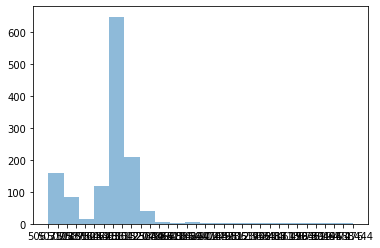

In [ ]:
plt.hist(wavenums, bins=20, alpha=0.5)
plt.show()
wavenums=pd.DataFrame(wavenums)
#wavenums.to_csv(r'/content/drive/My Drive/ML Spectroscopy/Data/Preprocessed/Eval Test/histo0.csv',index=False)